In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle as pkl

In [3]:
import sys

In [4]:
sys.path.insert(0, "/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning/bios_codes")

In [5]:
import os

In [6]:
from collections import Counter, defaultdict

In [7]:
from utils import *

In [8]:
from matplotlib import pyplot as plt

In [9]:
# import preprocess as pre

In [10]:
def load_titles(CACHE_DIR, filtered=''):
    titles_train, titles_val, titles_test = load_pickle(os.path.join(CACHE_DIR, f'titles.pkl{filtered}'))
    print(f'Titles: {len(titles_train)}, {len(titles_val)}, {len(titles_test)}')

    return titles_train, titles_val, titles_test

In [11]:
def load_bios_seq(scrubbed, CACHE_DIR, filtered=''):
    filename = f'bios_seq_scrubbed.pkl{filtered}' if scrubbed else f'bios_seq_no_scrubbed.pkl{filtered}'

    print(f"Loading {filename}")
    bios_train, bios_val, bios_test = load_pickle(os.path.join(CACHE_DIR, filename))
    print(f'Bios: {bios_train.shape}, {bios_val.shape}, {bios_test.shape}')

    return bios_train, bios_val, bios_test

In [12]:
def load_bios_raw(CACHE_DIR, filtered=''):
    filename = f'bios_raw.pkl{filtered}'

    print(f"Loading {filename}")
    bios_train, bios_val, bios_test = load_pickle(os.path.join(CACHE_DIR, filename))
    print(f'Bios: {len(bios_train)}, {len(bios_val)}, {len(bios_test)}')

    return bios_train, bios_val, bios_test

In [13]:
def load_vectorizers(CACHE_DIR):
    vectorizer_scrubbed, vectorizer_no_scrubbed, titles_encoder = load_pickle(os.path.join(CACHE_DIR, 'vectorizers.pkl'))
    print(f'Vectorizer scrubbed: {len(vectorizer_scrubbed.get_feature_names())}')
    print(f'Vectorizer no scrubbed: {len(vectorizer_no_scrubbed.get_feature_names())}')
    print(f'Titles: {len(titles_encoder.classes_)}')

    return vectorizer_scrubbed, vectorizer_no_scrubbed, titles_encoder

In [14]:
def load_vocab(scrubbed, CACHE_DIR):
    vectorizer_scrubbed, vectorizer_no_scrubbed, _ = load_vectorizers(CACHE_DIR)
    vectorizer = vectorizer_scrubbed if scrubbed else vectorizer_no_scrubbed
    vocab = vectorizer.vocabulary_

    return vocab

In [15]:
def load_prediction(scrubbed, model_name, pred_name, CACHE_DIR):
    filename = 'pred-scrub-'+model_name + pred_name + '.pkl' \
    if scrubbed else 'pred-no_scrub-'+model_name+pred_name + '.pkl'
    predictions = load_pickle(os.path.join(CACHE_DIR, filename))
    return predictions

In [112]:
ES_CACHE_DIR = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning\
/BiosBias/ES/cache_8l/finetune'

In [337]:
EN_CACHE_DIR = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning\
/BiosBias/EN/cache_gender_balanced/finetune'

In [338]:
en_test_gender_balanced = load_pickle(os.path.join(EN_CACHE_DIR, 'bios_raw.pkl'))

In [168]:
EN_CACHE_DIR = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning/BiosBias/EN/cache_8l'
ES_CACHE_DIR = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning\
/BiosBias/ES/cache_8l'

In [169]:
filtered=''
es_train_scrub, es_val_scrub, es_test_scrub = load_bios_raw(ES_CACHE_DIR, filtered)
es_train_noscrub, es_val_noscrub, es_test_noscrub = load_bios_raw(ES_CACHE_DIR, filtered)
es_titles_train, es_titles_val, es_titles_test = load_titles(ES_CACHE_DIR, filtered)

Loading bios_raw.pkl
Bios: 12307, 4103, 4103
Loading bios_raw.pkl
Bios: 12307, 4103, 4103
Titles: 12307, 4103, 4103


In [170]:
v_s, v_ns, te = load_vectorizers(EN_CACHE_DIR)

Vectorizer scrubbed: 8608
Vectorizer no scrubbed: 8608
Titles: 8


In [339]:
filtered=''
en_train_scrub, en_val_scrub, en_test_scrub = load_bios_raw(EN_CACHE_DIR, filtered)
en_titles_train, en_titles_val, en_titles_test = load_titles(EN_CACHE_DIR, filtered)

Loading bios_raw.pkl
Bios: 7770, 2604, 10510
Titles: 7770, 2604, 10510


In [340]:
en_train_scrub_seq, en_val_scrub_seq, en_test_scrub_seq = \
load_bios_seq(True, EN_CACHE_DIR)
en_train_noscrub_seq, en_val_noscrub_seq, en_test_noscrub_seq = \
load_bios_seq(False, EN_CACHE_DIR)

Loading bios_seq_scrubbed.pkl
Bios: (7770, 110), (2604, 110), (10510, 110)
Loading bios_seq_no_scrubbed.pkl
Bios: (7770, 110), (2604, 110), (10510, 110)


In [173]:
filtered=''
es_train_scrub, es_val_scrub, es_test_scrub = load_bios_raw(ES_CACHE_DIR, filtered)
es_train_noscrub, es_val_noscrub, es_test_noscrub = load_bios_raw(ES_CACHE_DIR, filtered)
es_titles_train, es_titles_val, es_titles_test = load_titles(ES_CACHE_DIR, filtered)

Loading bios_raw.pkl
Bios: 12307, 4103, 4103
Loading bios_raw.pkl
Bios: 12307, 4103, 4103
Titles: 12307, 4103, 4103


In [174]:
es_train_scrub_seq, es_val_scrub_seq, es_test_scrub_seq = \
load_bios_seq(True, ES_CACHE_DIR)
es_train_noscrub_seq, es_val_noscrub_seq, es_test_noscrub_seq = \
load_bios_seq(False, ES_CACHE_DIR)

Loading bios_seq_scrubbed.pkl
Bios: (12307, 110), (4103, 110), (4103, 110)
Loading bios_seq_no_scrubbed.pkl
Bios: (12307, 110), (4103, 110), (4103, 110)


In [68]:
FR_CACHE_DIR = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning\
/BiosBias/FR/cache_7l'

In [69]:
filtered=''
fr_train_scrub, fr_val_scrub, fr_test_scrub = load_bios_raw(FR_CACHE_DIR, filtered)
fr_train_noscrub, fr_val_noscrub, fr_test_noscrub = load_bios_raw(FR_CACHE_DIR, filtered)
fr_titles_train, fr_titles_val, fr_titles_test = load_titles(FR_CACHE_DIR, filtered)

Loading bios_raw.pkl
Bios: 5491, 1827, 1844
Loading bios_raw.pkl
Bios: 5491, 1827, 1844
Titles: 5491, 1827, 1844


In [70]:
fr_train_scrub_seq, fr_val_scrub_seq, fr_test_scrub_seq = \
load_bios_seq(True, FR_CACHE_DIR)
fr_train_noscrub_seq, fr_val_noscrub_seq, fr_test_noscrub_seq = \
load_bios_seq(False, FR_CACHE_DIR)

Loading bios_seq_scrubbed.pkl
Bios: (5491, 110), (1827, 110), (1844, 110)
Loading bios_seq_no_scrubbed.pkl
Bios: (5491, 110), (1827, 110), (1844, 110)


In [228]:
DE_CACHE_DIR = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning\
/BiosBias/DE/cache_gender_balanced/'

In [229]:
filtered=''
de_train_scrub, de_val_scrub, de_test_scrub = load_bios_raw(DE_CACHE_DIR, filtered)
de_train_noscrub, de_val_noscrub, de_test_noscrub = load_bios_raw(DE_CACHE_DIR, filtered)
de_titles_train, de_titles_val, de_titles_test = load_titles(DE_CACHE_DIR, filtered)

Loading bios_raw.pkl
Bios: 5856, 1954, 1334
Loading bios_raw.pkl
Bios: 5856, 1954, 1334
Titles: 5856, 1954, 1334


In [230]:
de_train_scrub_seq, de_val_scrub_seq, de_test_scrub_seq = \
load_bios_seq(True, DE_CACHE_DIR)
de_train_noscrub_seq, de_val_noscrub_seq, de_test_noscrub_seq = \
load_bios_seq(False, DE_CACHE_DIR)

Loading bios_seq_scrubbed.pkl
Bios: (5856, 110), (1954, 110), (1334, 110)
Loading bios_seq_no_scrubbed.pkl
Bios: (5856, 110), (1954, 110), (1334, 110)


In [231]:
Counter([x['title'] for x in de_train_scrub])

Counter({'journalist': 2412,
         'teacher': 946,
         'architect': 958,
         'painter': 406,
         'poet': 196,
         'professor': 268,
         'psychologist': 590,
         'model': 80})

In [232]:
def get_counts(dataset):
    counts = defaultdict(list)
    for x in dataset:
        if x['gender'] == 'M':
            counts[x['title']].append('M')
        elif x['gender'] == 'F':
            counts[x['title']].append('F')
        else:
            print("Wrong gender")
    for t in counts:
        print(t + '\t', Counter(counts[t]))
    return counts

In [233]:
c_test = get_counts(de_train_scrub)

journalist	 Counter({'M': 1206, 'F': 1206})
teacher	 Counter({'F': 473, 'M': 473})
architect	 Counter({'F': 479, 'M': 479})
painter	 Counter({'F': 203, 'M': 203})
poet	 Counter({'M': 98, 'F': 98})
professor	 Counter({'F': 134, 'M': 134})
psychologist	 Counter({'M': 295, 'F': 295})
model	 Counter({'M': 40, 'F': 40})


In [21]:
from matplotlib import pyplot as plt

In [22]:
from sklearn.utils import compute_class_weight

In [23]:
import random
random.seed(1110)

In [24]:
from collections import defaultdict

In [25]:
base_path = '/home/jyzhao/git7/Gender_bias_in-Cross_Lingual_Transfer_Learning/'

In [26]:
def get_res(prediction, es_test_scrub, es_titles_test):
    res = defaultdict(list)
    for idx in range(len(prediction)):
        gender = es_test_scrub[idx]['gender']
        if es_test_scrub[idx]['title'] in ['accountant', 'dentist']:
            continue
        if gender == 'M':
            res['m'].append([es_test_scrub[idx]['title'], es_titles_test[idx], prediction[idx]])
        elif gender == 'F':
            res['f'].append([es_test_scrub[idx]['title'], es_titles_test[idx], prediction[idx]])
        else:
            print('weird gender')
    m = np.sum([x[1] == x[2] for x in res['m']])
    f = np.sum([x[1] == x[2] for x in res['f']])
    print(f"{len(res['m'])} male instances; {len(res['f'])} female instances")
    print('male acc:', m / len(res['m']))
    print('female acc:', f / len(res['f']))
    print('diff acc:', m / len(res['m']) - f / len(res['f']))
    print('overall acc', (m+f) / (len(res['m'] + res['f'])))
    return res

In [27]:
def calculate_acc_by_occ(res, gender='m'):
    count_res = {}
    count_raw = defaultdict(list)
    for x in res[gender]:
        if x[1] == x[2]:
            count_raw[x[0]].append(1)
        else:
            count_raw[x[0]].append(0)
    for x in count_raw:
        count_res[x] = np.sum(count_raw[x]) / len(count_raw[x])
    return count_res, count_raw

In [28]:
import pandas as pd

In [35]:
Counter(en_titles_test)

Counter({5: 1479, 0: 723, 2: 1508, 3: 1280, 1: 2416, 7: 1644, 6: 392, 4: 1068})

In [341]:
en_test_ratio_no_balanced = compute_class_weight('balanced', np.unique(en_titles_test), en_titles_test)
en_test_ratio_no_balanced

array([1.8170816 , 0.5437707 , 0.871187  , 1.02636719, 1.230103  ,
       0.8882691 , 3.35140306, 0.799118  ])

<BarContainer object of 8 artists>

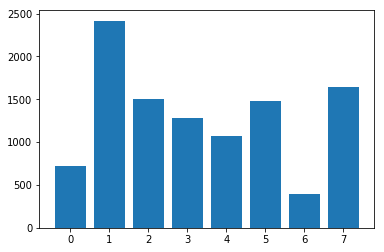

In [48]:
# plt.bar([x for x in Counter(en_titles_test)], [Counter(en_titles_test)[x] for x in Counter(en_titles_test)])

<BarContainer object of 8 artists>

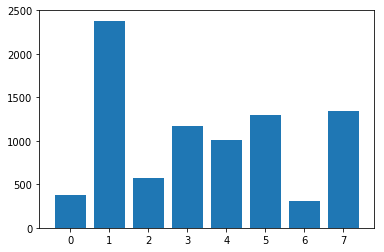

In [51]:
# plt.bar([x for x in Counter(en_titles_test)], [Counter(en_titles_test)[x] for x in Counter(en_titles_test)])

In [208]:
en_test_ratio = compute_class_weight('balanced', np.unique(en_titles_test), en_titles_test)
es_test_ratio = compute_class_weight('balanced', np.unique(es_titles_test), es_titles_test)
# en_test_ratio = [Counter(en_titles_test)[x] / sum(Counter(en_titles_test).values()) for x in range(8)]
# es_test_ratio = [Counter(es_titles_test)[x] / sum(Counter(es_titles_test).values()) for x in range(8)]

In [72]:
fr_test_ratio = compute_class_weight('balanced', np.unique(fr_titles_test), fr_titles_test)
fr_test_ratio

array([1.93697479, 0.58280657, 0.60697828, 1.09761905, 1.31714286,
       3.55984556, 0.85528757])

In [234]:
de_test_ratio = compute_class_weight('balanced', np.unique(de_titles_test), de_titles_test)
de_test_ratio

array([0.92638889, 0.32315891, 8.77631579, 1.83241758, 4.76428571,
       2.60546875, 1.13435374, 0.59131206])

In [235]:
def plot_acc_by_occ(res, flag, weight):
    plt.close('all')
    occ_acc_es2en_m, _ = calculate_acc_by_occ(res, 'm')
    occ_acc_es2en_f, _ = calculate_acc_by_occ(res, 'f')
    m_df = pd.DataFrame.from_dict(occ_acc_es2en_m, orient='index', columns=['m_acc'])
    f_df = pd.DataFrame.from_dict(occ_acc_es2en_f, orient='index', columns=['f_acc'])
    df = m_df.join(f_df)
#     df = df.drop(['accountant' , 'dentist'])
    df['diff'] = df['m_acc'] - df['f_acc']
    df['w_diff'] = df['diff'] * weight
    df['abs_diff'] = abs(df['diff'])
    df['w_abs_diff'] = df['abs_diff'] * weight
    df[['m_acc', 'f_acc']].plot(kind='bar', legend=False)
    plt.ylim([0,1])
    plt.title(f'accuracy of each occupation on {flag}')
    plt.savefig(f'figs/{flag}.pdf')
    plt.show()
    return df

4927 male instances; 5583 female instances
male acc: 0.4172924700629186
female acc: 0.46838617230879454
diff acc: -0.05109370224587595
overall acc 0.4444338725023787


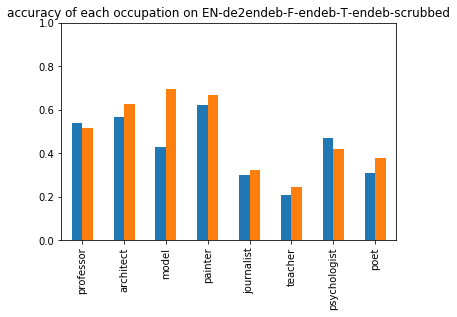

In [350]:
model_f = 'de2endeb-F-endeb'  #en ; es-F-en2es
pred_f = '-T-endeb'     #-T-en
LAN = 'EN'
# prediction_en = load_prediction(False, model_f, pred_f, EN_CACHE_DIR)
# res_en = get_res(prediction_en, en_test_scrub, en_titles_test)
# df_en_no_scrub = plot_acc_by_occ(res_en, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f))
# print('---')
prediction_en = load_prediction(True, model_f, pred_f, os.path.join(EN_CACHE_DIR, ''))
res_en = get_res(prediction_en, en_test_scrub, en_titles_test)
df_en_scrub = plot_acc_by_occ(res_en, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f), en_test_ratio)

In [351]:
df_en_scrub.describe()

,m_acc,f_acc,diff,w_diff,abs_diff,w_abs_diff
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.431520,0.483859,-0.052339,-0.025321,0.071640,0.080407
std,0.146069,0.169129,0.095953,0.112977,0.080451,0.078151
min,0.208644,0.243577,-0.266586,-0.232247,0.020182,0.024826
25%,0.308693,0.364276,-0.061422,-0.049945,0.032456,0.031997
50%,0.449827,0.466897,-0.041163,-0.031674,0.049786,0.047059
75%,0.547364,0.638125,-0.008880,-0.007251,0.061422,0.084103
max,0.622126,0.695652,0.052178,0.174870,0.266586,0.232247


In [ ]:
model_f = 'es2en' #pred-scrub-endeb-F-es2endeb-dp0.25-lr0.01-eps20-wde-5-T-es2endeb
pred_f = '-T-es2en'
LAN = 'ES'
# prediction_es = load_prediction(False, model_f, pred_f, ES_CACHE_DIR)
# res_es = get_res(prediction_es, es_test_scrub, es_titles_test)
# df_es_no_scrub = plot_acc_by_occ(res_es, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f))
# print('----\n------')
prediction_es = load_prediction(True, model_f, pred_f, os.path.join(ES_CACHE_DIR, ''))
res_es = get_res(prediction_es, es_test_scrub, es_titles_test)
df_es_scrub = plot_acc_by_occ(res_es, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f), es_test_ratio)

In [155]:
# df_es_scrub

In [156]:
df_es_scrub[(df_es_scrub['m_acc'] > 0.02) & (df_es_scrub['f_acc'] > 0.02)].describe()

,m_acc,f_acc,diff,w_diff,abs_diff,w_abs_diff
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.385236,0.397554,-0.012318,-0.020526,0.028250,0.037302
std,0.185886,0.173747,0.035956,0.053390,0.023541,0.041734
min,0.180288,0.198675,-0.075267,-0.134535,0.006464,0.003947
25%,0.233267,0.250490,-0.038121,-0.037308,0.009092,0.013372
50%,0.348851,0.362007,-0.001277,-0.006854,0.024074,0.026355
75%,0.524003,0.543509,0.010444,0.012512,0.038121,0.038973
max,0.642667,0.651685,0.033723,0.037275,0.075267,0.134535


1259 male instances; 585 female instances
male acc: 0.8030182684670373
female acc: 0.7931623931623931
diff acc: 0.009855875304644157
overall acc 0.7998915401301518


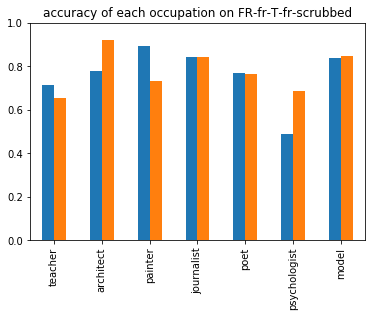

In [82]:
model_f = 'fr'  #en ; es-F-en2es
pred_f = '-T-fr'     #-T-en
LAN = 'FR'
# prediction_en = load_prediction(False, model_f, pred_f, EN_CACHE_DIR)
# res_en = get_res(prediction_en, en_test_scrub, en_titles_test)
# df_en_no_scrub = plot_acc_by_occ(res_en, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f))
# print('---')
prediction_fr = load_prediction(True, model_f, pred_f, os.path.join(FR_CACHE_DIR, 'bertModels'))
res_fr = get_res(prediction_fr, fr_test_scrub, fr_titles_test)
df_fr_scrub = plot_acc_by_occ(res_fr, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f), fr_test_ratio)

In [83]:
df_fr_scrub.describe()

,m_acc,f_acc,diff,w_diff,abs_diff,w_abs_diff
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.760598,0.777797,-0.017199,-0.081576,0.082608,0.146366
std,0.133712,0.095809,0.120038,0.283831,0.082418,0.251655
min,0.487179,0.653465,-0.198535,-0.706753,0.002206,0.002421
25%,0.743290,0.709524,-0.074292,-0.044312,0.007945,0.008746
50%,0.777778,0.763158,-0.002206,-0.002421,0.061510,0.082258
75%,0.840170,0.844995,0.034979,0.053810,0.150058,0.107819
max,0.892308,0.918919,0.158974,0.119144,0.198535,0.706753


977 male instances; 357 female instances
male acc: 0.3623336745138178
female acc: 0.35014005602240894
diff acc: 0.012193618491408875
overall acc 0.35907046476761617


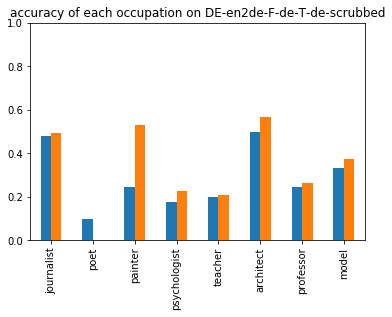

In [335]:
model_f = 'en2de-F-de' #pred-scrub-endeb-F-es2endeb-dp0.25-lr0.01-eps20-wde-5-T-es2endeb
pred_f = '-T-de'
LAN = 'DE'
# prediction_es = load_prediction(False, model_f, pred_f, ES_CACHE_DIR)
# res_es = get_res(prediction_es, es_test_scrub, es_titles_test)
# df_es_no_scrub = plot_acc_by_occ(res_es, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f))
# print('----\n------')
prediction_de = load_prediction(True, model_f, pred_f, os.path.join(DE_CACHE_DIR, ''))
res_de = get_res(prediction_de, de_test_scrub, de_titles_test)
df_de_scrub = plot_acc_by_occ(res_de, '{}-{}{}-scrubbed'.format(LAN, model_f, pred_f), de_test_ratio)

In [336]:
df_de_scrub.describe()

,m_acc,f_acc,diff,w_diff,abs_diff,w_abs_diff
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.284018,0.332516,-0.048498,-0.355263,0.072692,0.363081
std,0.143171,0.194257,0.108053,0.873490,0.091240,0.869809
min,0.096774,0.000000,-0.286169,-2.511505,0.007854,0.013454
25%,0.193461,0.220403,-0.052673,-0.109738,0.017666,0.023785
50%,0.243844,0.319079,-0.030190,-0.031028,0.044548,0.034346
75%,0.370301,0.504148,-0.012856,-0.019284,0.075495,0.109738
max,0.496815,0.565217,0.096774,0.031273,0.286169,2.511505


### df_fr_scrub[(df_fr_scrub['m_acc'] + df_fr_scrub['f_acc'])>1/7].describe()

In [54]:
prediction_es = load_prediction(False, 'es', '-T-es', ES_CACHE_DIR)
res_es = get_res(prediction_es)

3083 male instances; 1246 female instances
male acc: 0.5465455724943237
female acc: 0.5593900481540931
diff acc: -0.012844475659769428
overall acc 0.5502425502425502


In [55]:
prediction_es_ali = load_prediction(False, 'es2en', '-T-es2en', ES_CACHE_DIR)
res_es_align = get_res(prediction_es_ali)

3083 male instances; 1246 female instances
male acc: 0.5556276354200455
female acc: 0.5754414125200642
diff acc: -0.019813777100018748
overall acc 0.5613305613305614


In [56]:
prediction_es_endeb = load_prediction(False, 'es2endeb', '-T-es2endeb', ES_CACHE_DIR)
res_es_endeb = get_res(prediction_es_endeb)

3083 male instances; 1246 female instances
male acc: 0.5445994161530976
female acc: 0.5593900481540931
diff acc: -0.014790632000995507
overall acc 0.5488565488565489


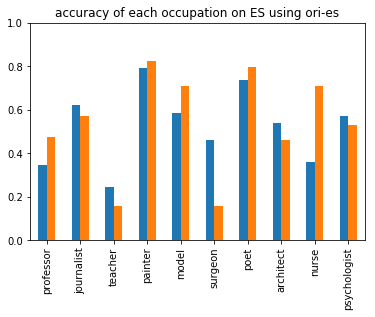

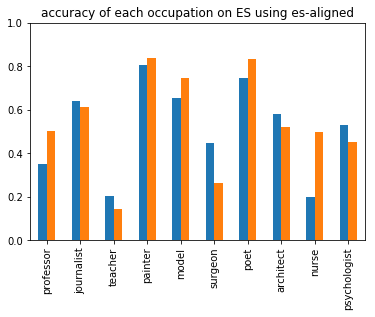

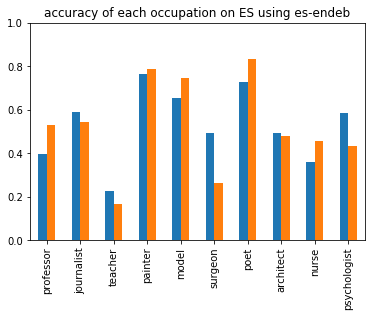

In [57]:
df_ori_es = plot_acc_by_occ(res_es, 'ES using ori-es')
df_es_ali = plot_acc_by_occ(res_es_align, 'ES using es-aligned')
df_es_endeb = plot_acc_by_occ(res_es_endeb, 'ES using es-endeb')

In [58]:
df_diff = df_ori_es[['diff']].copy()
df_diff['ali_diff'] = df_es_ali[['diff']].copy()
df_diff['endeb_diff'] = df_es_endeb[['diff']].copy()

In [59]:
df_diff

,diff,ali_diff,endeb_diff
professor,-0.128036,-0.153065,-0.132058
journalist,0.053051,0.029690,0.046892
teacher,0.087560,0.057747,0.059232
painter,-0.030729,-0.030208,-0.024479
model,-0.123265,-0.093920,-0.093004
surgeon,0.304792,0.184603,0.229379
poet,-0.057558,-0.085586,-0.106607
architect,0.076557,0.061722,0.014469
nurse,-0.348333,-0.300000,-0.098333
psychologist,0.044732,0.075260,0.150307


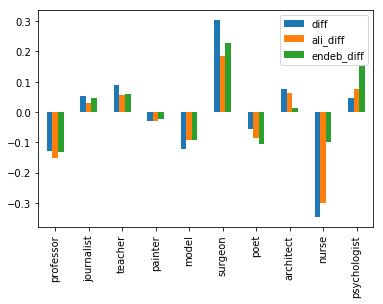

In [60]:
df_diff[['diff', 'ali_diff', 'endeb_diff']].plot(kind='bar')
plt.show()

In [306]:
df_diff.describe()

,diff,ali_diff,endeb_diff
count,12.000000,12.000000,12.000000
mean,-0.075967,-0.015657,-0.037400
std,0.258942,0.251251,0.278575
min,-0.750000,-0.666667,-0.666667
25%,-0.085577,-0.063225,-0.129225
50%,0.013373,0.011200,0.028588
75%,0.050160,0.117869,0.077725
max,0.137195,0.314024,0.335366


In [287]:
df_diff[abs(df_diff['ali_diff']) > abs(df_diff['diff'])]

,diff,ali_diff,endeb_diff
accountant,0.137195,0.314024,0.335366
journalist,0.021420,0.024403,0.026213
architect,0.003519,0.111893,0.030964
professor,0.005326,-0.049033,0.064075
teacher,0.126506,0.135797,0.118673
surgeon,0.031716,0.222015,0.287313


In [288]:
df_diff[abs(df_diff['endeb_diff']) > abs(df_diff['diff'])]

,diff,ali_diff,endeb_diff
accountant,0.137195,0.314024,0.335366
journalist,0.021420,0.024403,0.026213
architect,0.003519,0.111893,0.030964
professor,0.005326,-0.049033,0.064075
model,-0.072065,-0.051522,-0.125633
poet,-0.126111,-0.098333,-0.140000
surgeon,0.031716,0.222015,0.287313


### Transfer from EN to ES

- **Trained on original EN**

In [510]:
filtered='_filtered'
es_train_scrub, es_val_scrub, es_test_scrub = load_bios_raw(ES_CACHE_DIR, filtered)
es_train_noscrub, es_val_noscrub, es_test_noscrub = load_bios_raw(ES_CACHE_DIR, filtered)
es_titles_train, es_titles_val, es_titles_test = load_titles(ES_CACHE_DIR, filtered)

Loading bios_split_filtered.pkl
Bios: 3265, 1094, 1093
Loading bios_split_filtered.pkl
Bios: 3265, 1094, 1093
Titles: 3265, 1094, 1093


In [521]:
pred_T_es_endeb = load_prediction(True, 'en', '-T-es-endeb', ES_CACHE_DIR)
pred_T_es_ali = load_prediction(True, 'en', '-T-es-en-align', ES_CACHE_DIR)

In [522]:
res_es_endeb = get_res(pred_T_es_endeb)
print('-----')
res_es_ali = get_res(pred_T_es_ali)

male acc: 0.22296395193591456
female acc: 0.1744186046511628
diff acc: 0.048545347284751766
overall acc 0.20768526989935956
-----
male acc: 0.22296395193591456
female acc: 0.1744186046511628
diff acc: 0.048545347284751766
overall acc 0.20768526989935956


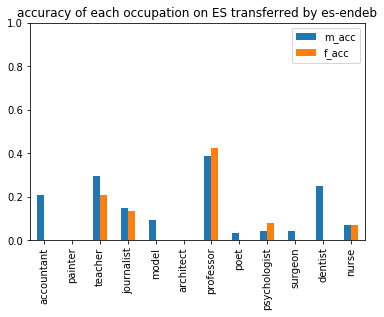

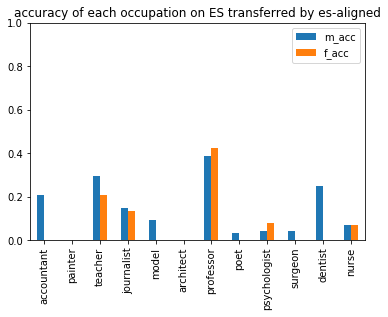

In [528]:
df_es_endeb = plot_acc_by_occ(res_es_endeb, 'ES transferred by es-endeb')
df_es_ali = plot_acc_by_occ(res_es_ali, 'ES transferred by es-aligned')

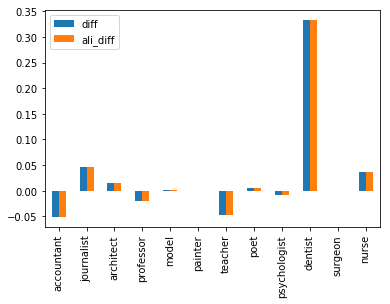

,diff,ali_diff
count,12.000000,12.000000
mean,0.025982,0.025982
std,0.100957,0.100957
min,-0.051829,-0.051829
25%,-0.010706,-0.010706
50%,0.000713,0.000713
75%,0.020169,0.020169
max,0.333333,0.333333


In [231]:
df_diff = df_es_endeb[['diff']].copy()
df_diff['ali_diff'] = df_es_ali[['diff']].copy()
df_diff[['diff', 'ali_diff']].plot(kind='bar')
plt.show()
df_diff.describe()

- **Trained on EN-debias**

In [524]:
pred_T_es_endeb = load_prediction(True, 'endeb', '-T-es-endeb', ES_CACHE_DIR)
pred_T_es_ali = load_prediction(True, 'endeb', '-T-es-en-align', ES_CACHE_DIR)
res_es_endeb = get_res(pred_T_es_endeb)
print('-----')
res_es_ali = get_res(pred_T_es_ali)

male acc: 0.24966622162883845
female acc: 0.22093023255813954
diff acc: 0.02873598907069891
overall acc 0.24062214089661482
-----
male acc: 0.24966622162883845
female acc: 0.22093023255813954
diff acc: 0.02873598907069891
overall acc 0.24062214089661482


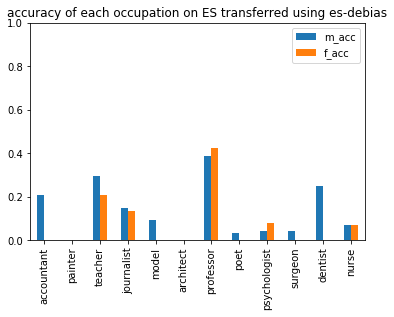

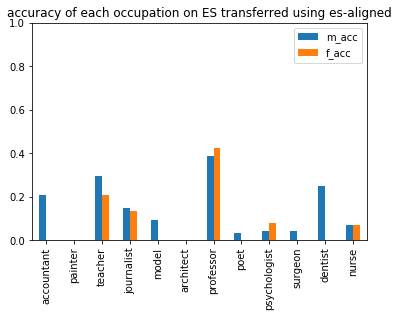

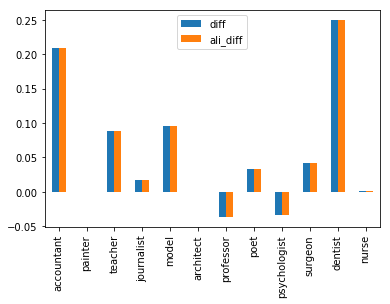

,diff,ali_diff
count,12.000000,12.000000
mean,0.055258,0.055258
std,0.091400,0.091400
min,-0.037447,-0.037447
25%,0.000000,0.000000
50%,0.025000,0.025000
75%,0.090228,0.090228
max,0.250000,0.250000


In [525]:
df_es_endeb = plot_acc_by_occ(res_es_endeb, 'ES transferred using es-debias')
df_es_ali = plot_acc_by_occ(res_es_ali, 'ES transferred using es-aligned')
df_diff = df_es_endeb[['diff']].copy()
df_diff['ali_diff'] = df_es_ali[['diff']].copy()
df_diff[['diff', 'ali_diff']].plot(kind='bar')
plt.show()
df_diff.describe()

In [475]:
with open(os.path.join(ES_CACHE_DIR, 'bios_seq_scrubbed_filtered.pkl'), 'wb') as f:
    pickle.dump((np.array(es_train_scrubbed_filtered),\
                 np.array(es_val_scrubbed_filtered), \
                 np.array(es_test_scrubbed_filtered)), f)
with open(os.path.join(ES_CACHE_DIR, 'bios_seq_no_scrubbed_filtered.pkl'), 'wb') as f:
    pickle.dump((np.array(es_train_no_scrubbed_filtered), \
                 np.array(es_val_no_scrubbed_filtered), \
                 np.array(es_test_no_scrubbed_filtered)), f)
with open(os.path.join(ES_CACHE_DIR, 'titles_filtered.pkl'), 'wb') as f:
    pickle.dump((np.array(es_titles_train_filtered), \
                 np.array(es_titles_val_filtered), \
                 np.array(es_titles_test_filtered)), f)   
with open(os.path.join(ES_CACHE_DIR, 'bios_split_filtered.pkl'), 'wb') as f:
    pickle.dump((np.array(es_train_raw_filtered), \
                 np.array(es_val_raw_filtered), \
                 np.array(es_test_raw_filtered)), f)

### test

In [559]:
debios = pkl.load(open('/local/jyzhao/Github/Gender_bias_in-Cross_Lingual_Transfer_Learning/BiosBias/DE/BIOS.pkl', 'rb'))

In [563]:
debios[900]

{'path': 'crawl-data/CC-MAIN-2017-26/segments/1498128320707.69/wet/CC-MAIN-20170626101322-20170626121322-00155.warc.wet.gz',
 'raw': 'Knapen — Ben Knapen (* 1951) ist ein niederländischer Journalist. Er war von 1990 bis 1996 Chefredakteur der Tageszeitung NRC Handelsblad. Leben Von Haus aus Historiker arbeitete Knapen ab Beginn der achtziger Jahre für das NOS Journaal und das NRC… … Deutsch Wikipedia',
 'name': ('Ben', '', 'Knapen'),
 'raw_title': 'Journalist',
 'gender': 'M',
 'start_pos': 65,
 'title': 'journalist',
 'URI': 'http://de.academic.ru/dic.nsf/dewiki/154073'}

----

In [55]:
import json
es_titles = json.load(open('freq_titles_es.json'))
de_titles = json.load(open('freq_titles_de.json'))
en_titles = json.load(open('/tmp/t-jizhao/data/biosbias/BiosBias/freq_titles.json'))
es_vals = [x.lower() for x in es_titles.values()]

In [138]:
len(set(en_titles.values()))

33

In [153]:
de_bkp = set()
for x in en_titles:
    if en_titles[x].lower() in es_vals:
#         print(en_titles[x].lower())
        de_bkp.add(en_titles[x].lower())

In [155]:
with open('/tmp/t-jizhao/data/biosbias/BiosBias/EN/data/filtered_titles', 'w') as f:
    for x in de_bkp:
        f.write(x+'\n')

In [149]:
with open('freq_titles_es_bkp.json', 'w') as f:
    json.dump(de_bkp, f)

In [62]:
set(en_titles.values()) & set([x.lower() for x in de_titles.values()])

{'accountant',
 'architect',
 'dentist',
 'journalist',
 'nurse',
 'painter',
 'physician',
 'surgeon',
 'teacher'}